## Exploratory data analysis and Shapley analysis
This notebook contains the exploratory data analysis for merged data collected from the repositories. It expects a file named `data/results/_all_results.csv` to exist, which contains the merged data. This file is created by running the `process_data.py` script with the `--mode=merge` argument.

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_repo_csv(repo_file):
    repo = pd.read_csv(f"data/results/{repo_file}", index_col=0)
    repo['date'] = pd.to_datetime(repo['date'], utc=True)
    return repo

Dataframes for individual repositories.

In [3]:
repo_files = list(set(os.listdir("data/results")) - {"_all_results.csv", "tiny"})

max_repos_load = 5
repos = {repo_file: load_repo_csv(repo_file) for repo_file in repo_files[:max_repos_load]}
repos.keys()

dict_keys(['py-spidev.csv', 'colorconsole.csv', 'flask-cors.csv', 'pydash.csv', 'google-auth-library-python-httplib2.csv'])

Dataframe for all results.

In [4]:
all_results = pd.read_csv("data/results/_all_results.csv", index_col=0)
all_results['date'] = pd.to_datetime(all_results['date'], utc=True)

all_results.describe()["radon_LOC"]

count    42954.000000
mean      7702.262118
std       8042.572265
min          0.000000
25%       1489.000000
50%       4344.000000
75%      12057.750000
max      45922.000000
Name: radon_LOC, dtype: float64

In [5]:
all_results.head()

,hash,author,date,commit_message,is_merge,lines_changed,insertions,deletions,dmm_unit_size,dmm_unit_complexity,...,radon_avg_cc,radon_avg_MI,radon_avg_vocabulary,radon_avg_length,radon_avg_volume,radon_avg_difficulty,radon_avg_effort,radon_avg_time,radon_avg_bugs,repo_name
ID,,,,,,,,,,,,,,,,,,,,,
0,1c6972eef4d4dc774fa50f29248f776fa6628e9e,Yilei Yang,2017-09-19 21:25:01+00:00,Initial commit: Abseil Python Common Libraries.,False,22843,22843,0,0.544562,0.767955,...,1.956307,65.930709,36.338983,59.20339,393.256327,2.797832,3096.346638,172.019258,0.131085,abseil-py
1,e8d3808145a248845098dea839b1ff6753981f18,Yilei Yang,2017-09-25 17:28:32+00:00,Move the --only_check_args check earlier. So ...,False,14,12,2,1.000000,1.000000,...,1.955519,65.918611,36.338983,59.20339,393.256327,2.797832,3096.346638,172.019258,0.131085,abseil-py
2,a03c793c3db4d35cac68953c4207e1929881362c,Yilei Yang,2017-09-25 17:29:23+00:00,Fix FLAGS.set_default's docstring. It only se...,False,7,4,3,NaN,NaN,...,1.955519,65.918328,36.338983,59.20339,393.256327,2.797832,3096.346638,172.019258,0.131085,abseil-py
3,9b5d766f40f8ff1d2c74c88b95340fdc01a42ef2,Yilei Yang,2017-09-25 17:29:56+00:00,Code cleanup. PiperOrigin-RevId: 169707068,False,5,1,4,NaN,NaN,...,1.955519,65.918655,36.338983,59.20339,393.256327,2.797832,3096.346638,172.019258,0.131085,abseil-py
4,99d72774ba05271cf2aa6d9cf80da8508ae48d59,Yilei Yang,2017-09-25 17:31:47+00:00,Clean up unused code. PiperOrigin-RevId: 1697...,False,15,1,14,1.000000,1.000000,...,1.955519,65.919108,36.338983,59.20339,393.256327,2.797832,3096.346638,172.019258,0.131085,abseil-py


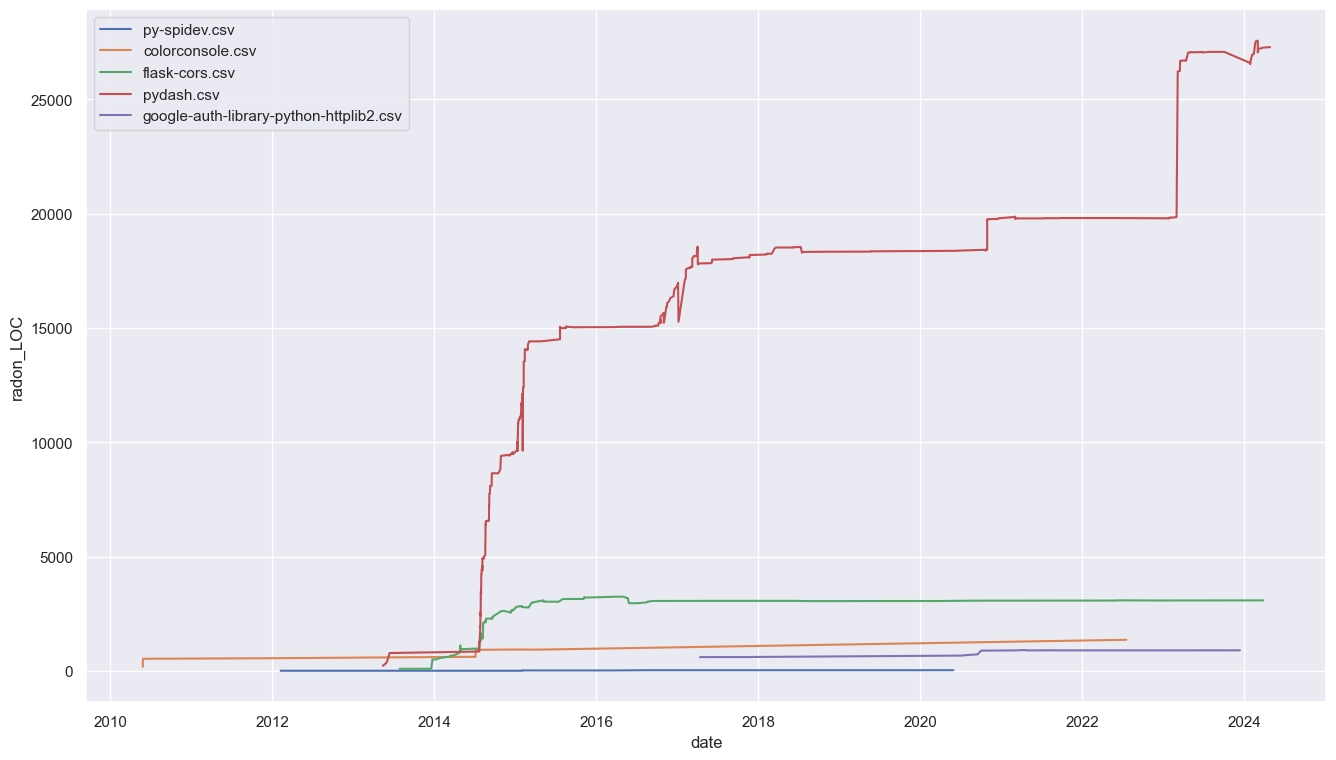

In [39]:
# Sample codebase size throughout time.
for repo_name, df in repos.items():
    sns.lineplot(data=df, x='date', y='radon_LOC', label=repo_name)

<Axes: xlabel='radon_LOC', ylabel='radon_avg_difficulty'>

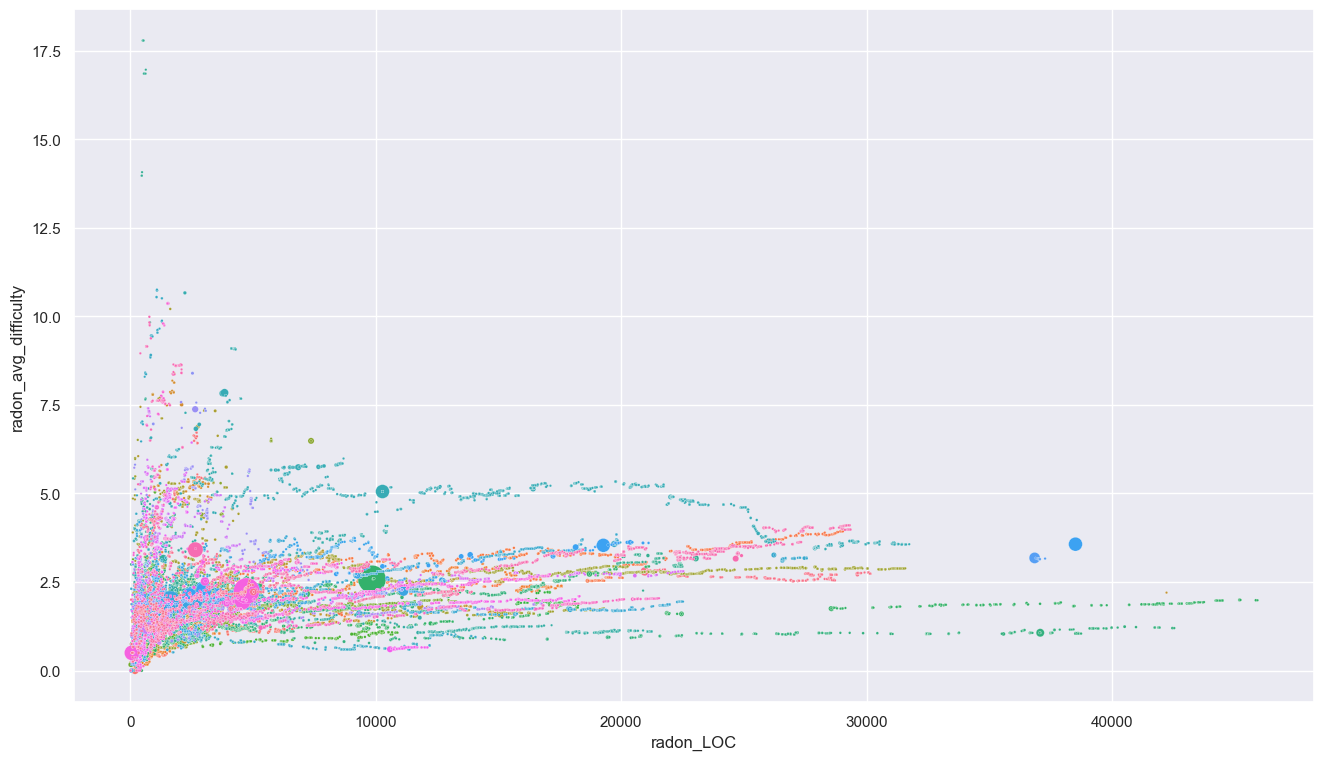

In [59]:
sns.scatterplot(data=all_results, x='radon_LOC', y='radon_avg_difficulty', hue='repo_name', size='lines_changed', sizes=(3, 400), legend=False)
# plt.xscale("log")
# plt.xlim([50, 50000])

In [11]:
# Find rows with lowest and highest value of something.
col = "radon_avg_effort"
# all_results.loc[all_results[col].idxmin()], all_results.loc[all_results[col].idxmax()]
# sort by column
all_results.sort_values(by=col, ascending=False).head(400)

,hash,author,date,commit_message,is_merge,lines_changed,insertions,deletions,dmm_unit_size,dmm_unit_complexity,...,radon_avg_cc,radon_avg_MI,radon_avg_vocabulary,radon_avg_length,radon_avg_volume,radon_avg_difficulty,radon_avg_effort,radon_avg_time,radon_avg_bugs,repo_name
ID,,,,,,,,,,,,,,,,,,,,,
11369,7c6173d9ffcdd54f3e6e606919696ae49d2ebedb,John Reese,2018-11-12 01:24:42+00:00,Rename module to diff-match-patch,False,31,16,15,NaN,NaN,...,5.724138,50.462195,230.875000,581.625000,5555.591530,6.548370,99588.085840,5532.671436,1.851864,diff-match-patch
11374,67421872cd9d8323b62bf25d3427935f852e3498,John Reese,2020-07-13 07:02:51+00:00,Formatting,False,10935,6279,4656,0.000000,0.870210,...,5.724138,51.970454,230.500000,581.250000,5554.997169,6.485870,99587.788660,5532.654926,1.851666,diff-match-patch
11368,5c861343276bf5978626168efadbc60af2cd17e6,John Reese,2018-11-07 22:27:57+00:00,Version bump v2018.11.06.1,False,2,1,1,NaN,NaN,...,5.724138,53.567799,230.500000,581.250000,5554.997169,6.485870,99587.788660,5532.654926,1.851666,diff-match-patch
11376,beff1ccc1244a2b8227a4698613d1d96e157e79b,Amethyst Reese,2023-04-30 21:16:24+00:00,"Update names, url, and copyright",False,8,4,4,NaN,NaN,...,5.724138,51.970454,230.500000,581.250000,5554.997169,6.485870,99587.788660,5532.654926,1.851666,diff-match-patch
11365,8018438fca64d4058424cd715246303d1ec93ce6,John Reese,2018-11-07 20:16:28+00:00,Support both py2 and py3 using conditional imp...,False,2864,2850,14,0.180970,0.411692,...,5.724138,53.567799,230.500000,581.250000,5554.997169,6.485870,99587.788660,5532.654926,1.851666,diff-match-patch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31247,a81c6448a45d48beafdc7dd1033e1f3eec92b6c7,Ionel Cristian Mărieș,2014-12-08 02:44:00+00:00,Build the extension and remove the un-necessar...,False,1663,372,1291,0.850112,0.769575,...,1.137931,55.211047,90.142857,192.571429,1633.935943,5.707170,30700.799547,1705.599975,0.544645,python-lazy-object-proxy
31253,7ee041c383a39e9655d38b8f36832bf4b94f952a,Ionel Cristian Mărieș,2014-12-09 00:07:36+00:00,Spacing updates.,False,94,61,33,NaN,NaN,...,1.141026,55.240883,90.142857,192.571429,1633.935943,5.707170,30700.799547,1705.599975,0.544645,python-lazy-object-proxy
31245,10233a4d3aedf2cfe8629cd98f985f832761e28b,Ionel Cristian Mărieș,2014-12-07 18:01:06+00:00,Skip some of these tests.,False,12,10,2,NaN,NaN,...,1.122807,58.151350,89.285714,191.285714,1629.181055,5.492884,30690.270867,1705.015048,0.543060,python-lazy-object-proxy


Text(0, 0.5, 'MI')

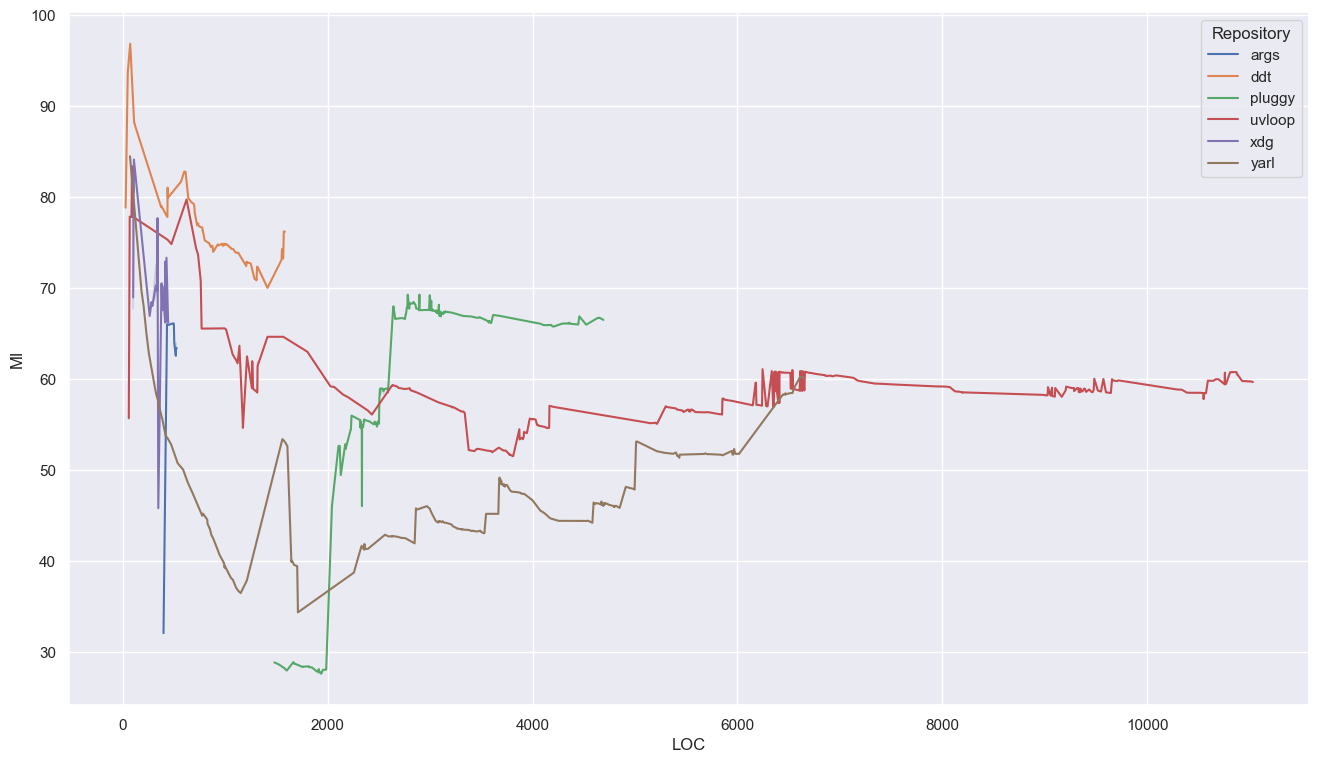

In [56]:
sns.set_theme(rc={'figure.figsize':(16,9)})

# custom_repo_list = ["pyhcl", "easydict", "imagesize_py", "colors", "pylev", "chardet", "ddate", "twine", "ConfigArgParse"]
custom_repo_list = ['yarl', 'uvloop', 'args', 'pluggy', 'xdg', 'ddt']
small_results = all_results[all_results["repo_name"].isin(custom_repo_list)]
metric = "MI"

sns.lineplot(data=small_results, x='radon_LOC', y="radon_avg_" + metric, hue='repo_name', )
# Legend label name
plt.legend(title='Repository')
plt.xlabel("LOC")
plt.ylabel(metric)
# plt.xlim([0, 2500])

Shapley analysis.

In [9]:
import json

import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import shap

In [10]:
DATA_FILE = "data/results/_all_results.csv"

cols = ["radon_LOC", "radon_LLOC", "radon_SLOC", "radon_comments", "radon_avg_cc", "radon_avg_MI", "radon_avg_vocabulary", "radon_avg_length", "radon_avg_volume", "radon_avg_difficulty", "radon_avg_effort", "radon_avg_time", "radon_avg_bugs"]
data = pd.read_csv(DATA_FILE, usecols=cols)

# Map feature names for readability.
with open("feature-label-map.json", "r") as f:
    feature_label_map = json.load(f)
data.rename(columns=feature_label_map, inplace=True)

y = data["LOC"]
X = data.drop(["LOC", "LLOC", "SLOC", "Comments"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)

# Hyperparameters for the LightGBM model.
lgbm_params = {
    "objective": "regression",
    "metrics": ["rmse", "mape"],
    "verbose": 0
}

model = lgb.train(lgbm_params, train_data, num_boost_round=1000)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [11]:
for boost_rounds in range(500, 1000, 100):
    print(f"Boost rounds: {boost_rounds}")
    model = lgb.train(lgbm_params, train_data, num_boost_round=boost_rounds)
    cv_metrics = lgb.cv(lgbm_params, train_data, num_boost_round=boost_rounds)
    for metric, values in cv_metrics.items():
        print(f"mean of '{metric}': {np.mean(values)}")


Boost rounds: 500


C:\Users\msmar\msro\metric-dynamics\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean of 'valid rmse-mean': 1580.0550257070922
mean of 'valid rmse-stdv': 50.60647942282443
mean of 'valid mape-mean': 0.6923124895909035
mean of 'valid mape-stdv': 0.034489700876926335
Boost rounds: 600


C:\Users\msmar\msro\metric-dynamics\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean of 'valid rmse-mean': 1470.4797538576904
mean of 'valid rmse-stdv': 53.103827053102684
mean of 'valid mape-mean': 0.6352924515545691
mean of 'valid mape-stdv': 0.031210670130444925
Boost rounds: 700


C:\Users\msmar\msro\metric-dynamics\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean of 'valid rmse-mean': 1385.579914324514
mean of 'valid rmse-stdv': 55.44659308988356
mean of 'valid mape-mean': 0.5911283896932286
mean of 'valid mape-stdv': 0.02875002373985099
Boost rounds: 800


C:\Users\msmar\msro\metric-dynamics\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean of 'valid rmse-mean': 1317.5202956087835
mean of 'valid rmse-stdv': 57.38881504665003
mean of 'valid mape-mean': 0.5555447607791864
mean of 'valid mape-stdv': 0.026947123931327227
Boost rounds: 900


C:\Users\msmar\msro\metric-dynamics\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean of 'valid rmse-mean': 1261.3483402692123
mean of 'valid rmse-stdv': 59.09260222748487
mean of 'valid mape-mean': 0.5262087942843344
mean of 'valid mape-stdv': 0.025574823276297863


In [12]:
# Testing
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)

Mean Squared Error: 521075.0754931968
Root Mean Squared Error: 721.8553009386277
Mean Absolute Error: 380.7232098840841
Mean Absolute Percentage Error: 341046944687552.6
R-squared: 0.9917604862985768


In [13]:
sns.set_theme(rc={'figure.figsize':(16,9)})

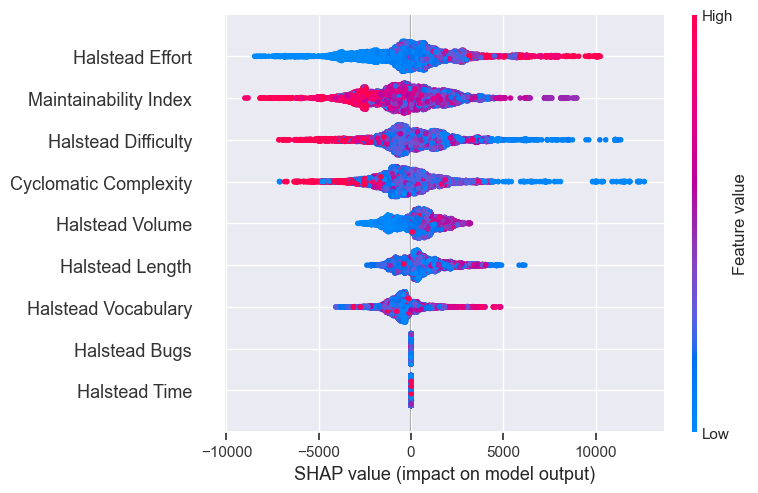

In [14]:
explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [15]:
shap_values_from_explainer = explainer(X_test)

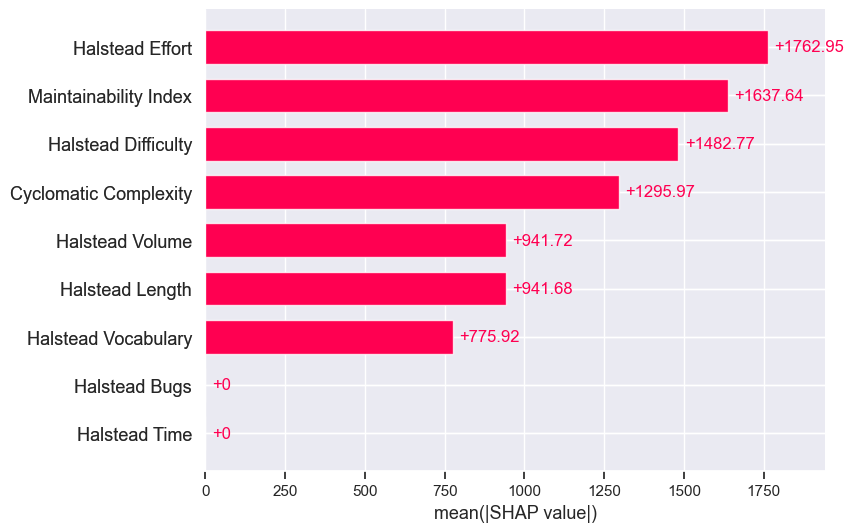

In [16]:
shap.plots.bar(shap_values_from_explainer)

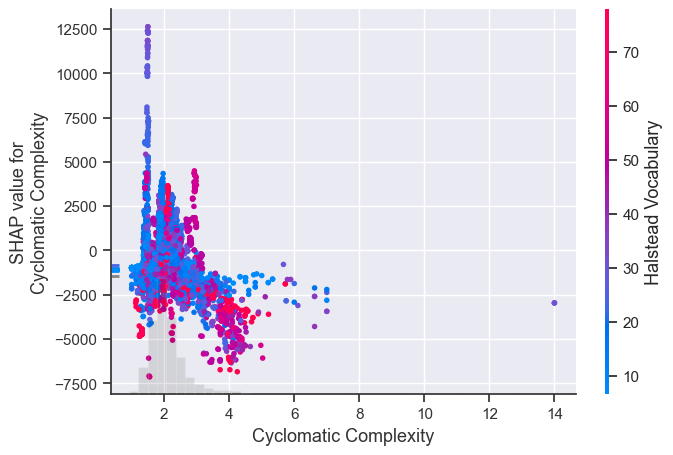

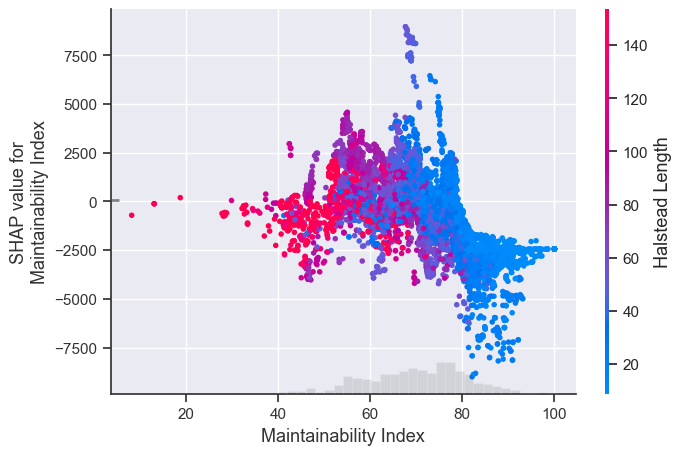

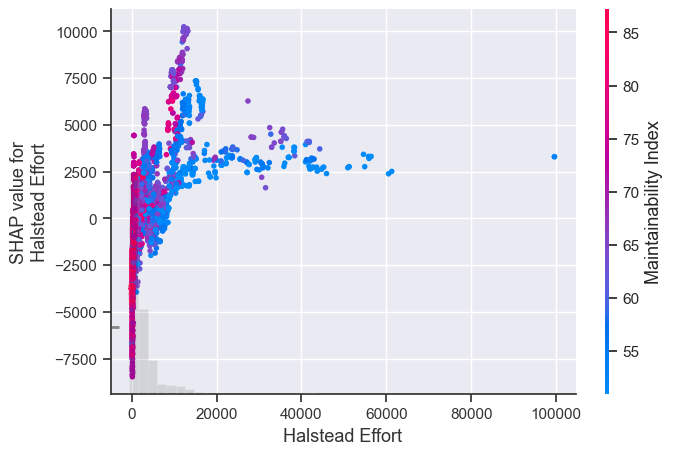

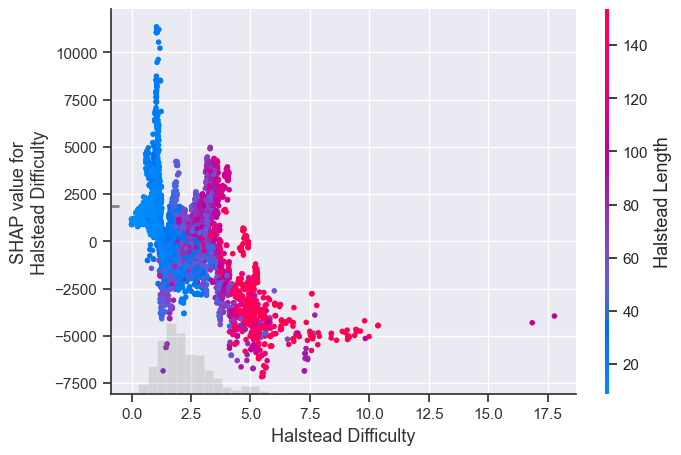

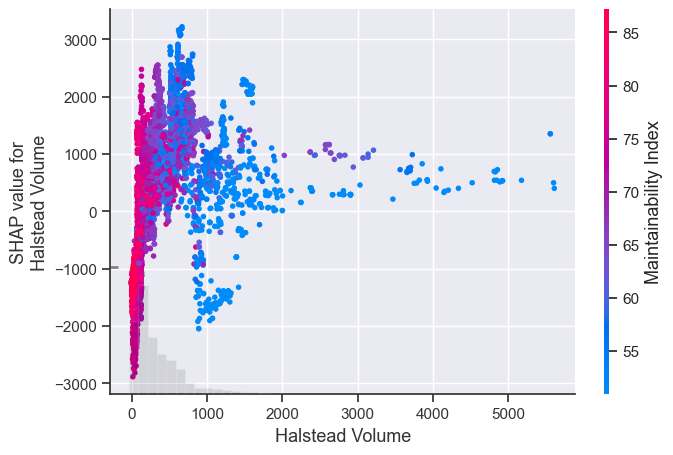

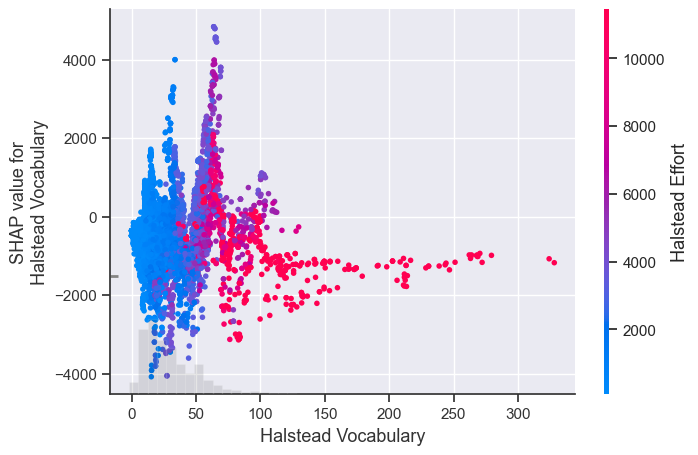

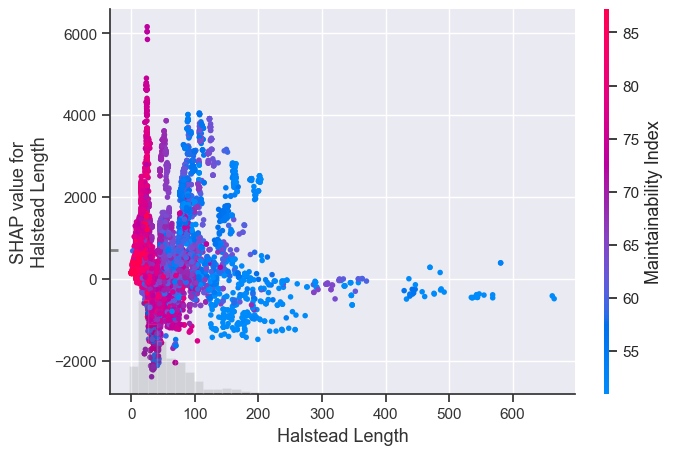

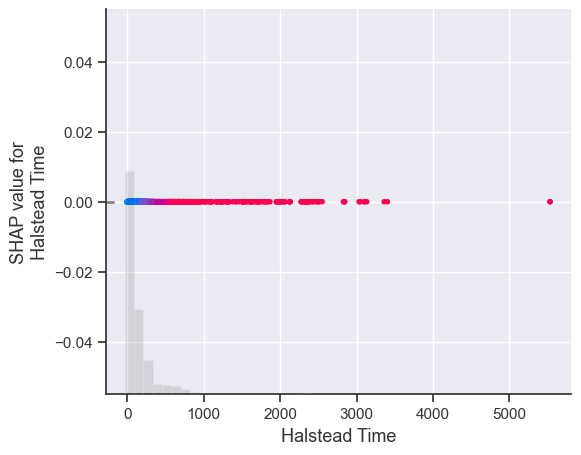

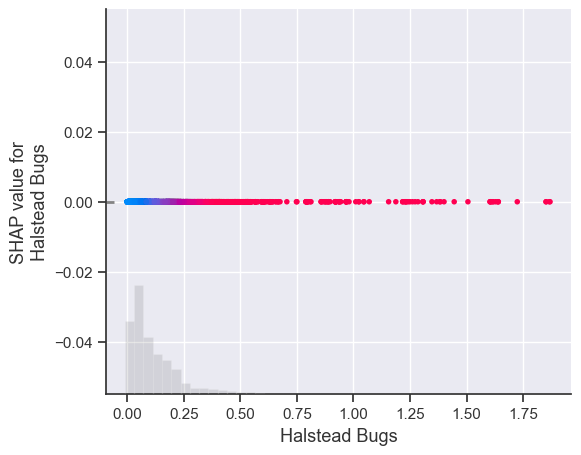

In [17]:
# Dependence plot for specific feature.
features = ["Cyclomatic Complexity", "Maintainability Index", "Halstead Effort", "Halstead Difficulty", "Halstead Volume", "Halstead Vocabulary", "Halstead Length", "Halstead Time", "Halstead Bugs"]
for feature in features:
    # shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)
    shap.plots.scatter(shap_values_from_explainer[:, feature], color=shap_values_from_explainer)

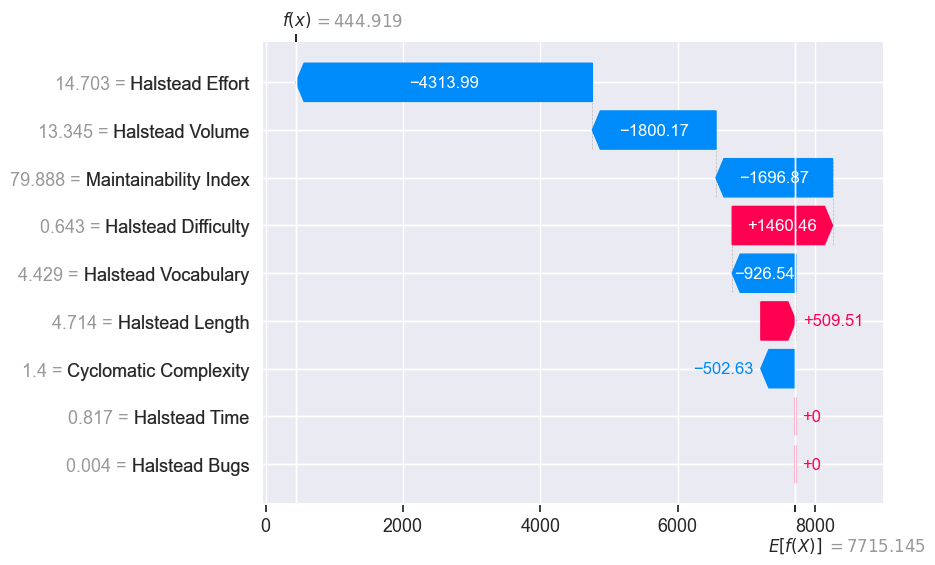

In [18]:
shap.plots.waterfall(shap_values_from_explainer[1])

<Axes: xlabel='LOC'>

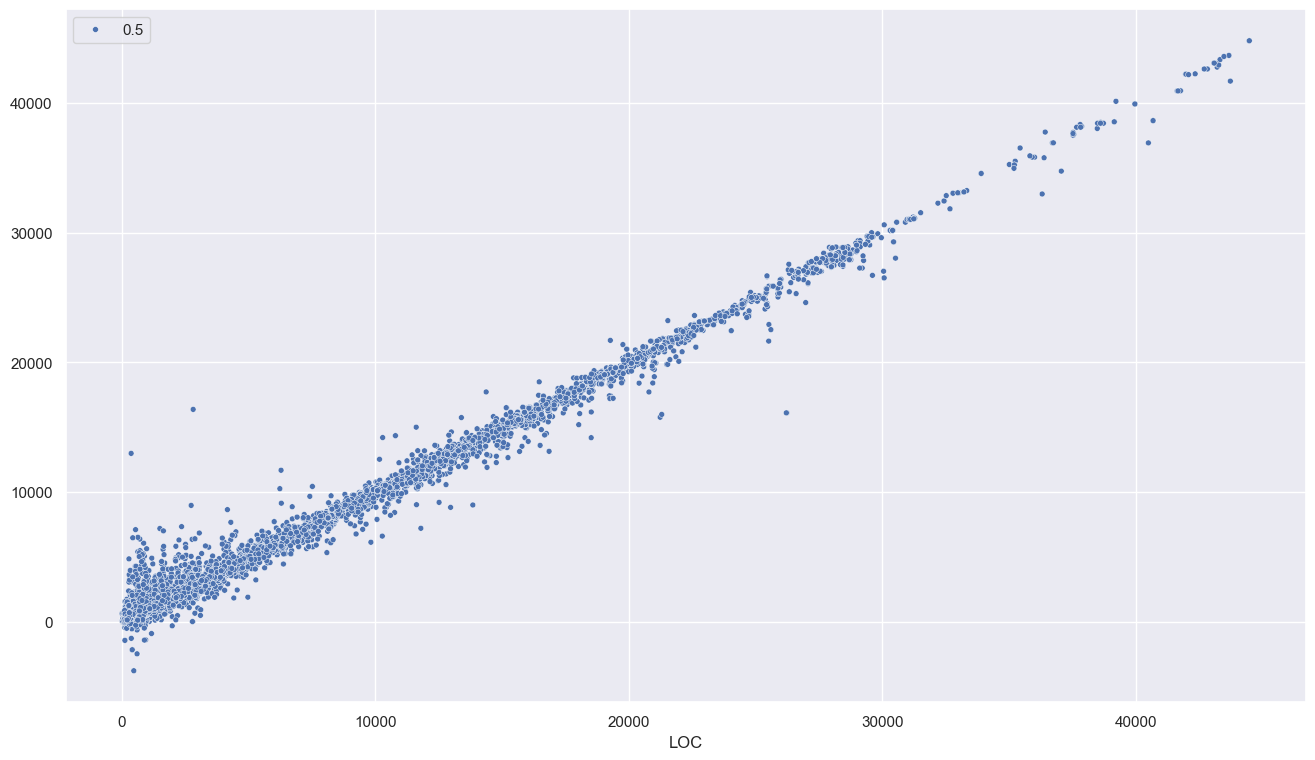

In [19]:
sns.scatterplot(x=y_test, y=y_pred_test, size=0.5)